# Louvain

This notebook illustrates the clustering of a graph by the [Louvain algorithm](https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering).

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Clustering**

In [4]:
louvain = skn.clustering.Louvain('python')
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='python'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [5]:
labels = louvain.labels_
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [6]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [12 11  6  5]


**Visualization**

In [7]:
from networkx import from_scipy_sparse_matrix, draw

In [8]:
graph = from_scipy_sparse_matrix(adjacency)

In [9]:
colors = ['r','g','b','c','m','y']

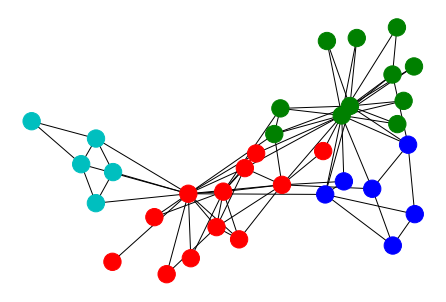

In [12]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph])

**Metrics**

In [13]:
modularity = skn.clustering.modularity(adjacency,labels)

In [14]:
np.round(modularity,2)

0.42

**Parameters**

In [15]:
# default engine = numba if available
louvain = skn.clustering.Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [16]:
# resolution parameter
louvain = skn.clustering.Louvain(resolution=2)
louvain.fit(adjacency)
labels = louvain.labels_
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3 4 5 6] [7 7 6 6 4 2 2]


In [17]:
# node weights in the null model
louvain.fit(adjacency, weights='uniform')
labels = louvain.labels_
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3 4 5 6 7 8 9] [9 8 5 4 2 2 1 1 1 1]


## Directed graphs

**Loading**

In [18]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Clustering**

In [28]:
louvain = skn.clustering.Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [29]:
labels = louvain.labels_
print(labels)

[2 0 1 0 1 1 3 0 2 1 2 0 0 3]


In [30]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [5 4 3 2]


**Visualization**

In [31]:
from networkx import from_scipy_sparse_matrix, draw, DiGraph

In [32]:
graph = from_scipy_sparse_matrix(adjacency,create_using=DiGraph())

In [33]:
colors = ['r','g','b','c','m','y']

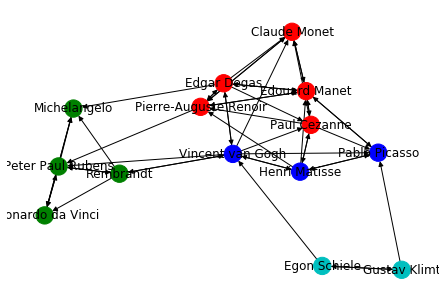

In [35]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph],labels = names)

**Metrics**

In [36]:
modularity = skn.clustering.modularity(adjacency,labels)

In [37]:
np.round(modularity,2)

0.32

## Bipartite graphs

**Loading**

In [38]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [39]:
louvain = skn.clustering.Louvain()
louvain.fit(biadjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [40]:
labels = louvain.labels_
feature_labels = louvain.feature_labels_
print(labels, feature_labels)

[3 3 1 4 4 1 1 1 0 2 0 0 0 2 2] [2 3 3 1 1 0 4 1 1 0 0 2 2 0 2 0]


In [41]:
unique_labels, counts = np.unique(labels, return_counts = True)
_,feature_counts = np.unique(feature_labels, return_counts = True)
print(unique_labels, counts, feature_counts)

[0 1 2 3 4] [4 4 3 2 2] [5 4 4 2 1]


In [42]:
# Graph as undirected (ignoring the bipartite structure)
louvain.fit(biadjacency, force_undirected=True)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [43]:
labels2 = louvain.labels_
feature_labels2 = louvain.feature_labels_
print(labels2, feature_labels2)

[1 1 0 0 1 0 0 0 3 2 3 0 3 2 2] [1 1 1 0 0 0 1 0 0 3 3 2 2 0 2 3]


In [44]:
unique_labels2, counts2 = np.unique(labels2, return_counts = True)
_,feature_counts2 = np.unique(feature_labels2, return_counts = True)
print(unique_labels2, counts2, feature_counts2)

[0 1 2 3] [6 3 3 3] [6 4 3 3]


**Visualization**

In [45]:
from networkx import from_scipy_sparse_matrix, draw, draw_networkx_labels

In [46]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [47]:
graph = from_scipy_sparse_matrix(adjacency)

In [48]:
colors = ['r','g','b','c','m','y']

In [49]:
n,p = biadjacency.shape
pos = {i: (0,i) for i in range(n)} 
pos.update({n + i: (2,i) for i in range(p)})

In [50]:
pos_labels = {i: (0.5,i) for i in range(n)} 
pos_labels.update({n + i: (1.5,i) for i in range(p)})

In [51]:
names = movies
names.update({n + i: actors[i] for i in actors})

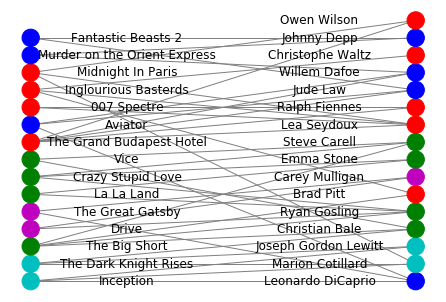

In [52]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=[colors[np.append(labels, feature_labels)[i]] for i in graph], edge_color = 'grey')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)

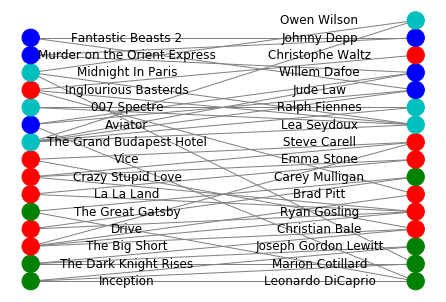

In [53]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=[colors[np.append(labels2, feature_labels2)[i]] for i in graph], edge_color = 'grey')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)

**Metrics**

In [54]:
from sknetwork.clustering import bimodularity
from sknetwork.clustering import modularity

In [55]:
np.round(bimodularity(biadjacency,labels,feature_labels),3)

0.573

In [56]:
np.round(bimodularity(biadjacency,labels2,feature_labels2),3)

0.558

In [57]:
np.round(modularity(adjacency,np.append(labels, feature_labels),3))

0.0

In [58]:
np.round(modularity(adjacency,np.append(labels2, feature_labels2),3))

0.0